# $f(x) = 3x - cos(x+1)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numerical_methods import *

%matplotlib inline

In [2]:
start = -1
end = 1
deg = 4

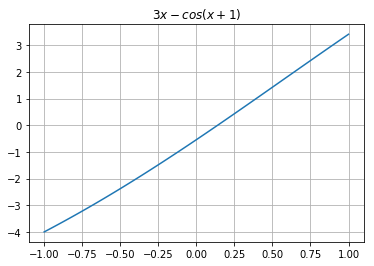

In [3]:
f = lambda x: 3*x - np.cos(x+1)
fig, ax = plt.subplots()
ax.grid()
ax.set_title('$3x-cos(x+1)$')
x = np.linspace(start, end, 100)
plt.plot(x, f(x))
plt.show()

In [4]:
base = [lambda x: x* 0 + 1,
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3
       ]

In [5]:
def points(start, end, n , f, base):
    xs = np.linspace(start, end, n)
    fs = list(f(xs))
    Q = []
    for func in base:
        Q.append(list(func(xs)))
    xs = list(xs)
    return xs, fs, Q

In [6]:
def MSE(Q, fs):
    Q = Array(Q).T()
    y = Array([fs]).T()
    H = Q.T() @ Q
    b = Q.T() @ y
    return gauss(H, b.T()).array, Q, y, H, b

In [7]:
xs, fs, Q = points(start, end, 6, f, base)
res, Q, y, H, b = MSE(Q, fs)

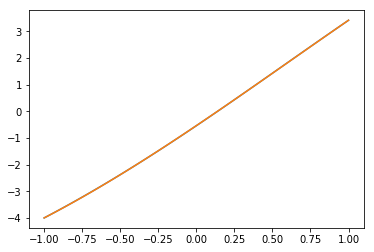

In [8]:
f = lambda x: 3*x - np.cos(x+1)
app = lambda x: sum([res[i][0]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
plt.plot(x, f(x))
plt.plot(x, app(x))
plt.show()

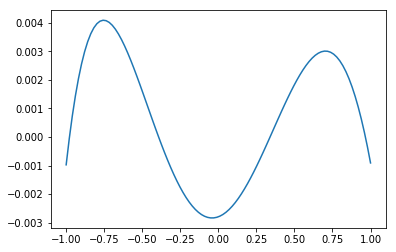

In [9]:
f = lambda x: 3*x - np.cos(x+1)
app = lambda x: sum([res[i][0]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
plt.plot(x, f(x)-app(x))
plt.show()

## Полиномы Лежандра

In [10]:
from sympy import *

In [11]:
x = Symbol('x')
f = 3*x - cos(x+1)
deg = 4

In [12]:
def legendre(f):
    base = []
    for i in range(deg):
        base.append(1/(factorial(i)*2**i)* diff((1-x**2)**i, x, i))
    res = [float(integrate(f*i, (x, start, end))/ integrate(i**2, (x, start, end))) for i in base]
    base_n = [lambda x: x*0 +1]
    for i in range(1, deg):
        base_n.append(lambdify(x, base[i]))
    return res, base_n

In [13]:
res, base = legendre(f)

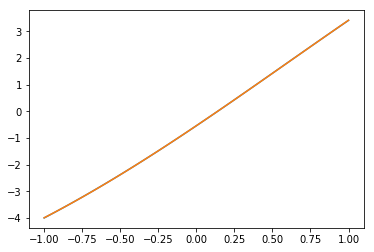

In [14]:
app = lambda x: sum([res[i]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
f = lambda x: 3*x - np.cos(x+1)
plt.plot(x, f(x))
plt.plot(x, app(x))
plt.show()

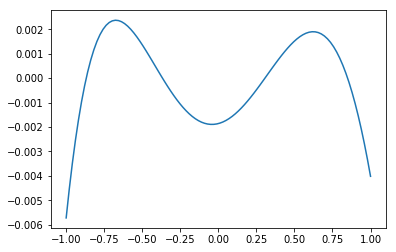

In [15]:
app = lambda x: sum([res[i]*base[i](x) for i in range(deg)])
fig = plt.subplots()
x = np.linspace(start, end, 100)
f = lambda x: 3*x - np.cos(x+1)
plt.plot(x, f(x)-app(x))
plt.show()